In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load synthetic portfolio data
df = pd.read_csv('/workspaces/backtesting/investment-portfolio-project/data/synthetic_portfolio.csv', index_col=0, parse_dates=True)

# Select one asset for backtesting, e.g., 'A'
asset = 'A'
returns = df[asset]


KeyError: 'A'

In [ ]:
# Convert log returns to price series
price = 100 * np.exp(returns.cumsum())
price = price.to_frame(name='Price')


In [ ]:
# Define short and long window periods
short_window = 5
long_window = 10

# Calculate moving averages
price['SMA_Short'] = price['Price'].rolling(window=short_window).mean()
price['SMA_Long'] = price['Price'].rolling(window=long_window).mean()

# Generate signals
price['Signal'] = 0
price['Signal'][short_window:] = np.where(
    price['SMA_Short'][short_window:] > price['SMA_Long'][short_window:], 1, 0
)

# Calculate positions
price['Position'] = price['Signal'].shift(1)


/tmp/ipykernel_21796/1145130566.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price['Signal'][short_window:] = np.where(
/tmp/ipykernel_21796/1145130566.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
# Calculate daily returns
price['Market_Returns'] = price['Price'].pct_change()
price['Strategy_Returns'] = price['Position'] * price['Market_Returns']

# Calculate cumulative returns
price['Cumulative_Market_Returns'] = (1 + price['Market_Returns']).cumprod()
price['Cumulative_Strategy_Returns'] = (1 + price['Strategy_Returns']).cumprod()


In [ ]:
# Calculate Sharpe Ratio
sharpe_ratio = (
    price['Strategy_Returns'].mean() / price['Strategy_Returns'].std()
) * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: -5.60


In [ ]:
# Calculate drawdown
price['Cumulative_Max'] = price['Cumulative_Strategy_Returns'].cummax()
price['Drawdown'] = price['Cumulative_Strategy_Returns'] / price['Cumulative_Max'] - 1
max_drawdown = price['Drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")


Maximum Drawdown: -3.75%


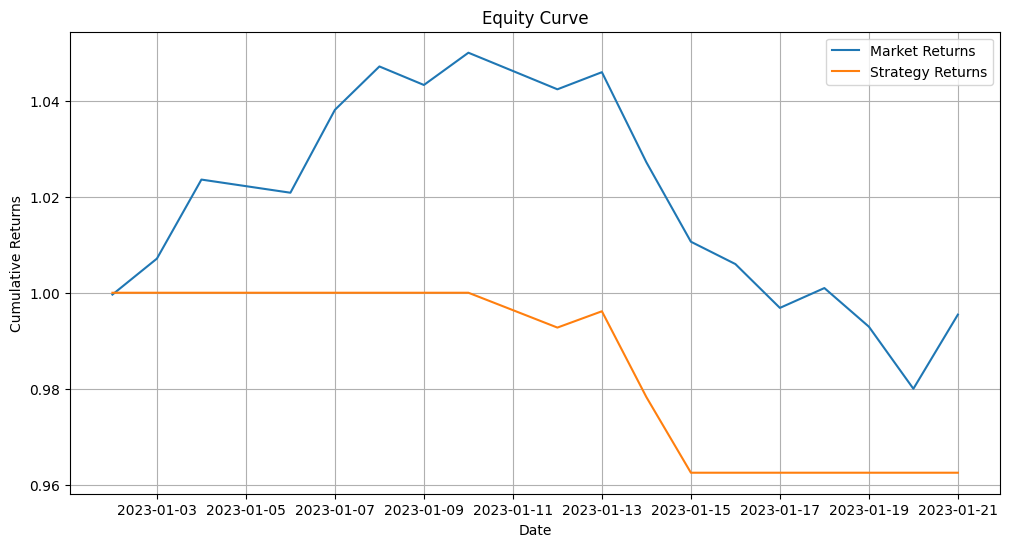

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(price['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(price['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


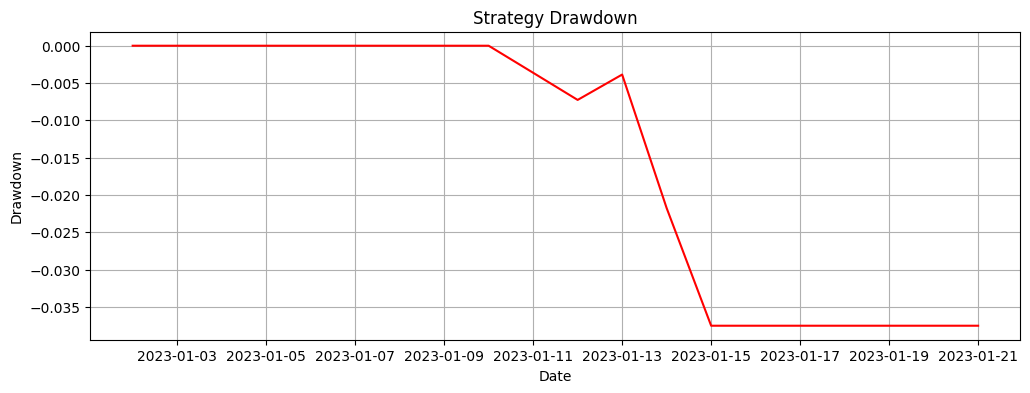

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(price['Drawdown'], label='Drawdown', color='red')
plt.title('Strategy Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()
